## 5.3.4 Poisson distribution and Charlier Chaos

$$ f(k;\lambda) = e^{-\lambda} \frac{\lambda^k}{k!}$$

When $\lambda=1$, $k\sim poisson(1)$; when $\lambda=2$, $k\sim poisson(2)$;

$$ \zeta \sim Poisson(\lambda)$$

[Wiki - Charlier Polynomial](https://en.wikipedia.org/wiki/Charlier_polynomials)

<font color = red> ** By the following formula:**</font>
$$ C_n(x;a) =\ _2F_0(-n,-x;;-\frac{1}{a})$$ 

$$
\begin{align*}
C_0(x,a) &= 1\\
C_1(x,a) &= 1-\frac{x}{a}\\
C_2(x,a) &= 1-\frac{2x}{a}+\frac{x^2-x}{a^2}\\
C_3(x,a) &= 1-\frac{3x}{a}+\frac{3(x^2-x)}{a^2}+\frac{-x^3+3x^2-2x}{a^3}\\
C_4(x,a) &= 1-\frac{4x}{a}+\frac{6(x^2-x)}{a^2}+\frac{4(-x^3+3x^2-2x)}{a^3}+\frac{x^4-6x^3+11x^2-6x}{a^4}\\
\cdots
\end{align*}
$$
<font color = red> **If by formula from Wiki with [Laguerre](https://en.wikipedia.org/wiki/Laguerre_polynomials)**</font>

$$C_n(x;a) = (-1)^n n! L_n^{(-1-x)}(-\frac{1}{a})$$

$*$<font color = blue> ** Need to swith the sign in odd terms** </font>

Laguerre Polynomial
$$ L_n^{\alpha}(x) = \frac{(\alpha+1)_n}{n!}\  _1F_1(-n;\alpha+1;x)$$

$$
\begin{align*}
C_0(x,a) &= L_0^{(-1-x)} (-\frac{1}{a})=\ _1F_1(0;-x;-\frac{1}{a})=1 \\
C_1(x,a) &= (-1) L_1^{(-1-x)} (-\frac{1}{a}) =(-1)\frac{(-x)_1}{1!}\ _1F_1(-1;-x;-\frac{1}{a})= x-\frac{1}{a}\\
C_2(x,a) &= (-1)^2 2! L_2^{(-1-x)} (-\frac{1}{a}) =2 \frac{(-x)_2}{2!}\ _1F_1(-2;-x;-\frac{1}{a})= x^2 -x-\frac{2}{a}x +\frac{2}{a}+\frac{1}{a^2}\\
\cdots
\end{align*}
$$

<font color = red> $**$ When $\lambda=a=1$, switching the sign seems enough if we look at the first two polynomials in both definitions, but when $\lambda=2$, swithing the sign will not be enough since $1-\frac{x}{2} \neq -(x-\frac{1}{2})$, besides $1-\frac{2x}{a}+\frac{x^2-x}{a^2} \neq -(x^2 -x-\frac{2}{a}x +\frac{2}{a}+\frac{1}{a^2})$ even when $\lambda=1$.

If the author uses the polynomial chaos as the second one, then I will not get the second error plot correctly.

So I think when the author was solving the differential equation system, he used the first definiton. But when he made the first plot, he switched the sign on purpose (for some unknown reasons), and when he made the error plot, he still used the first definition.

[Bell Polynomial](http://mathworld.wolfram.com/BellPolynomial.html)

The $k$-th moment terms of $Poisson(\lambda)$ form Bell polynomial

### `mpmath.hyp2f0(a, b, z)` - For Charlier polynomial

Gives the hypergeometric function $_2F_0$, defined formally by the series
$$
_2F_0(a,b;;z)=\sum_{n=0}^{\infty} (a)_n (b)_n \frac{z^n}{n!}
$$
This series usually does not converge. For small enough $z$, it can be viewed as an asymptotic series that may be summed directly with an appropriate truncation. When this is not the case, `hyp2f0()` gives a regularized sum, or equivalently, it uses a representation in terms of the hypergeometric $U$ function [1]. The series also converges when either $a$ or $b$ is a nonpositive integer, as it then terminates into a polynomial after $−a$ or $−b$ terms.

P641
$$
C_n(x; a) = _2F_0(-n, -x; ; -\frac{1}{a})
$$

In [ ]:
import mpmath as mp
mp.hyp2f0(-1,-0.5,-1)  #mp.hyp2f0(-1,-1,-1) gives me error

In [ ]:
Char((1,1))(0.5)

In [27]:
import numpy as np
from math import factorial
from scipy.stats import poisson
from matplotlib import pyplot as plt
from scipy.integrate import odeint

%matplotlib notebook

In [19]:
def Char(params):
    '''
    The first 4 (degree from 0 to 4) Charlier polynomial
    Follow definition on P641
    '''
    n = params[0]  #degree
    a = params[1]  #parameter value
    if n==0:
        return lambda u: 1
    elif n==1:
        return lambda u: 1-u/a
    elif n==2:
        return lambda u: 1-2*u/a+2*(u**2-u)/(2*a**2)
    elif n==3:
        return lambda u: 1-3*u/a+3*(u**2-u)/(a**2)+(-u**3+3*u**2-2*u)/(a**3)
    else: #this actually means n=4
        return lambda u: 1-4*u/a+6*(u**2-u)/(a**2)+4*(-u**3+3*u**2-2*u)/(a**3)+(u**4-6*u**3+11*u**2-6*u)/(a**4)
    
############# Charlier Chaos ###############
def inner2_ch(n,a):
    '''
    n is the degree of charlier polynomial
    a is the parameter of Poisson
    '''
    return (a**(-n))*factorial(n)

def product3_ch(i,j,l,a):
    #compute \Phi_i*\Phi_j*\Phi_l
    '''
    a is the parameter of Poisson
    '''
    return lambda x: Char((i,a))(x)*Char((j,a))(x)*Char((l,a))(x)

def inner3_ch(i,j,l,a):
    #compute <\Phi_i\Phi_j\Phi_l>
    inner = 0 
    for k in range(11):
        inner += np.e**(-a)*a**k*product3_ch(i,j,l,a)(k)/factorial(k)
    
    return inner

In [20]:
def ode_system_ch(y, t, P, a):   
    #P indicates the highest degree
    #a indicates value of lambda
    dydt = np.zeros(P+1) 
    for l in range(len(dydt)):
        dydt[l] = -(sum(sum(inner3_ch(i,j,l,a)*ki_ch[i]*y[j] for j in range(P+1)) for i in range(P+1)))/inner2_ch(l,a)
    return dydt

In [21]:
P = 4
a = 1

ki_ch = [a,-1*a]+[0]*(P-1)
sol_ch = odeint(ode_system_ch, [1.0]+[0.0]*P, np.linspace(0,1,101), args=(P, a)) 

In [22]:
def y_determ_ch(x):
    return np.e**(-x)

## <font color = red> Need to put $(-1)^i$

<IPython.core.display.Javascript object>


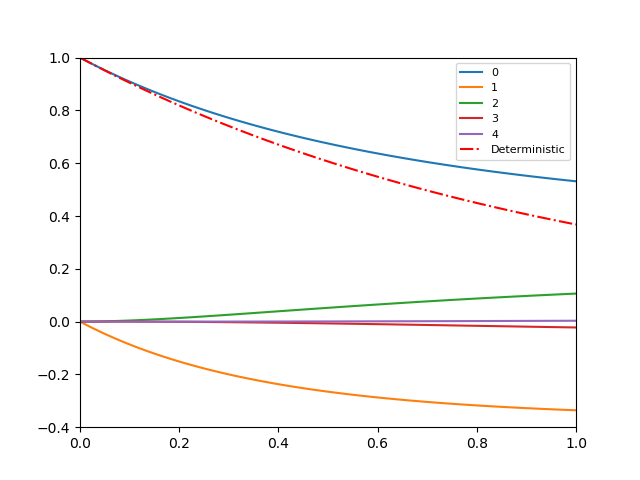

In [23]:
plt.figure()
plt.ylim([-0.4,1])
plt.xlim([0,1])

x= np.linspace(0,1,101)

for i in range(P+1):
    plt.plot(x,(-1)**i*sol_ch[:,i],label=i)
#    plt.plot(x,sol_ch[:,i],label=i)

plt.plot(x, y_determ_ch(x), color='r', linestyle='-.',label='Deterministic')
plt.legend(prop={'size': 8})

### Error plot
$$
\bar{y}_{exact}(t) = \hat{y_0} e^{-\lambda+\lambda e^{-t}} \ \ \ \ \ \ \ \ \bar{y}(t) = y_0
$$
So 
$$
\epsilon_{mean}(t) = \left| \frac{\bar{y}(t) - \bar{y}_{exact}(t)}{\bar{y}_{exact}(t)}\right|
$$

$$
\sigma_{exact}(t) = \hat{y_0}^2 e^{-\lambda +\lambda e^{-2t}} -\hat{y_0}^2 e^{-2\lambda +2\lambda e^{-t}} \ \ \ \ \ \ \ \ \sigma(t) = a_1y_1^2 +a_2y_2^2+a_3y_3^2+a_4y_4^2
$$
The coefficients $(a_1, a_2, a_3, a_4)$ in $\sigma(t)$ can be obtained by code below.

So
$$
\epsilon_{variance}(t) = \left| \frac{\sigma(t) - \sigma_{exact}(t)}{\sigma_{exact}(t)} \right|= \ldots
$$

<font color = red>This is $\lambda=1$
$\downarrow$

In [32]:
a_1 = 1 #value of lambda
allcoeff_534_1 = np.zeros((5,4))   #store ki value/ column 0 stores ki when P=1; column 1 stores ki when P=2
allcoeff_534_1[0,:]=a_1*np.ones(4)
allcoeff_534_1[1,:]=-1*a_1*np.ones(4)
y_534_1 = np.zeros((5,4))   #row 0 stores y0 for each P from 1-4; row 1 stores y1 for P from 1-4;...
#h = unif_icdf([-1,1])                          #index k follows uniform distr

for i in range(4):
    P=i+1
    ki_ch = allcoeff_534_1[:,i]
    y_mid=odeint(ode_system_ch, [1.0]+[0.0]*P, np.linspace(0,1,2), args=(P, a_1))[1,:]
    y_534_1[:,i] = y_mid.tolist()+[0]*(4-P)

`expect(func, args=(mu,), loc=0, lb=None, ub=None, conditional=False)`

In [34]:
def g(params):
    n = params
    return lambda u: (Char((n,1))(u))**2

for i in range(1,5):
    print(poisson.expect(g(i), args=(1,), loc=0, lb=None, ub=None, conditional=False))

1.0
2.0
6.0
24.000000000000004


In [35]:
############# lambda = 1 ################ 
a_1 = 1

mean_534_1 = y_534_1[0,:]
mean_exact_534_1 = np.e**(-a_1+a_1*np.e**(-1))
error_mean_534_1=np.abs((mean_534_1 - mean_exact_534_1)/mean_exact_534_1)


sigma2_534_1=np.zeros(4)
for i in range(4):
    sigma2_534_1[i]=y_534_1[1,i]**2+2*y_534_1[2,i]**2+6*y_534_1[3,i]**2+24*y_534_1[4,i]**2
    
sigma2_exact_534_1 = np.e**(-a_1+a_1*np.e**(-2))-np.e**(-2*a_1+2*a_1*np.e**(-1))

error_var_534_1=np.abs((sigma2_534_1-sigma2_exact_534_1)/sigma2_exact_534_1)

<font color = red>This is $\lambda=2$
$\downarrow$

In [33]:
a_2 = 2 #value of lambda
allcoeff_534_2 = np.zeros((5,4))   #store ki value/ column 0 stores ki when P=1; column 1 stores ki when P=2
allcoeff_534_2[0,:]=a_2*np.ones(4)
allcoeff_534_2[1,:]=-1*a_2*np.ones(4)
y_534_2 = np.zeros((5,4))   #row 0 stores y0 for each P from 1-4; row 1 stores y1 for P from 1-4;...
#h = unif_icdf([-1,1])                          #index k follows uniform distr

for i in range(4):
    P=i+1
    ki_ch = allcoeff_534_2[:,i]
    y_mid=odeint(ode_system_ch, [1.0]+[0.0]*P, np.linspace(0,1,2), args=(P, a_2))[1,:]
    y_534_2[:,i] = y_mid.tolist()+[0]*(4-P)

In [36]:
def g(params):
    n = params
    return lambda u: (Char((n,2))(u))**2

for i in range(1,5):
    print(poisson.expect(g(i), args=(2,), loc=0, lb=None, ub=None, conditional=False))

0.49999999999999994
0.4999999999999999
0.7499999999999998
1.4999999999999996


In [37]:
############# lambda = 2 ################ 
a_2 = 2

mean_534_2 = y_534_2[0,:]
mean_exact_534_2 = np.e**(-a_2+a_2*np.e**(-1))
error_mean_534_2=np.abs((mean_534_2 - mean_exact_534_2)/mean_exact_534_2)


sigma2_534_2=np.zeros(4)
for i in range(4):
    sigma2_534_2[i]=0.5*y_534_2[1,i]**2+0.5*y_534_2[2,i]**2+0.75*y_534_2[3,i]**2+1.5*y_534_2[4,i]**2
    
sigma2_exact_534_2 = np.e**(-a_2+a_2*np.e**(-2))-np.e**(-2*a_2+2*a_2*np.e**(-1))

error_var_534_2=np.abs((sigma2_534_2-sigma2_exact_534_2)/sigma2_exact_534_2)

### <font color = red> The error of mean plots when $\lambda=2$ is a little different 

<IPython.core.display.Javascript object>


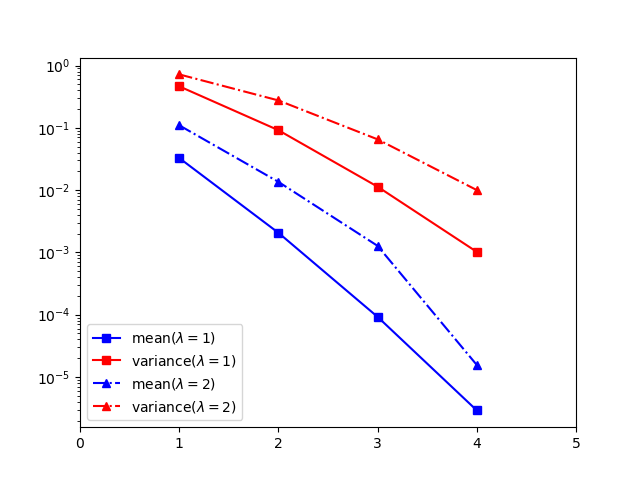

In [40]:
plt.figure()
plt.xlim([0,5])
plt.semilogy([1,2,3,4],error_mean_534_1,'-bs',label='mean($\lambda=1$)')
plt.semilogy([1,2,3,4],error_var_534_1,'-rs',label='variance($\lambda=1$)')
plt.semilogy([1,2,3,4],error_mean_534_2,'-.b^',label='mean($\lambda=2$)')
plt.semilogy([1,2,3,4],error_var_534_2,'-.r^',label='variance($\lambda=2$)')
plt.legend()